In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\avocado.csv (1).zip")

In [7]:
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [8]:
data.drop(columns=["Unnamed: 0","Date"],inplace=True)

In [9]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
# Lets start with classification model , we are suppose to classify the region of observation 
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
print(data["type"].value_counts())
data.isnull().sum()

conventional    9126
organic         9123
Name: type, dtype: int64


AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
data.replace({"conventional":"0","organic":"1"},inplace=True)
data.rename(columns=({"4046":"code1","4225":"code2","4770":"code3"}),inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
df=LabelEncoder().fit_transform(data["region"])
data["region"]=df

In [14]:
data.head()

,AveragePrice,Total Volume,code1,code2,code3,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


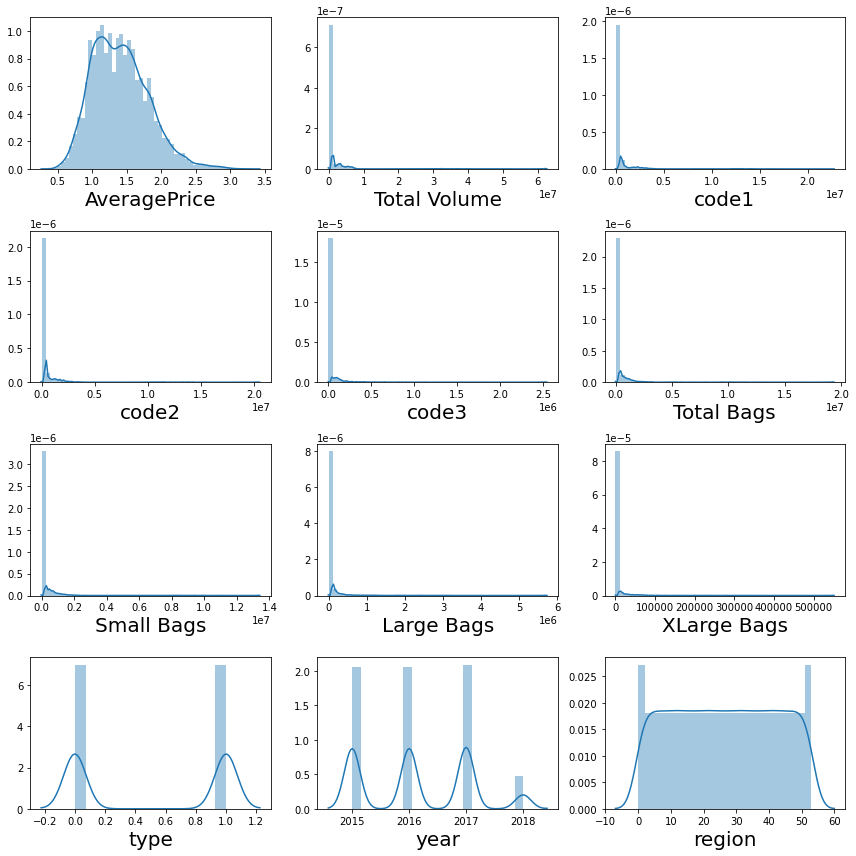

In [15]:
plt.figure(figsize=(12,12))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
# We need to check the correlation of various features with the target variable
corr=data.corr()
corr.shape



(11, 11)

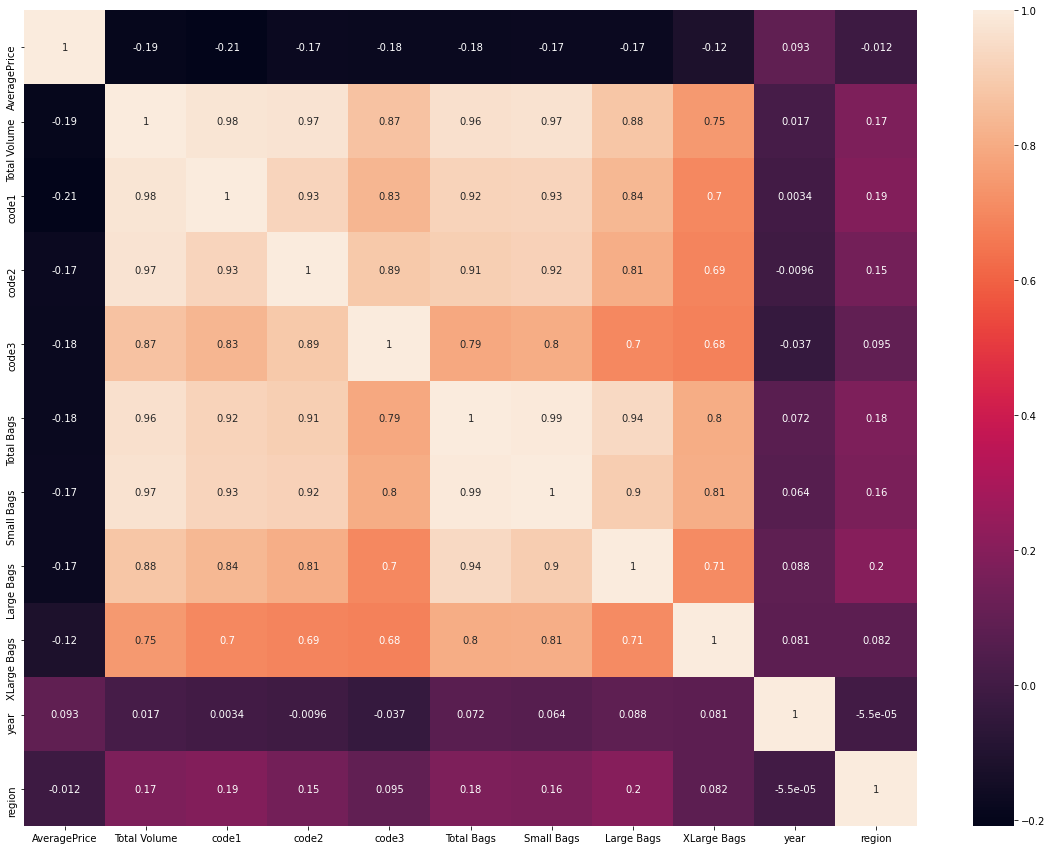

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()



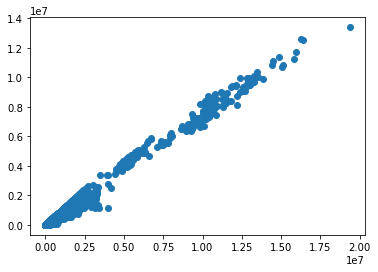

In [18]:
plt.scatter(data["Total Bags"],data["Small Bags"])

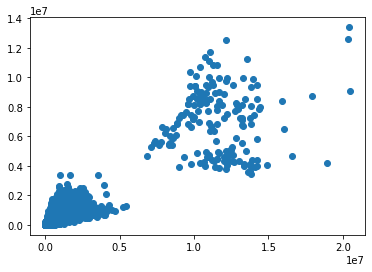

In [19]:
plt.scatter(data["code2"],data["Small Bags"])

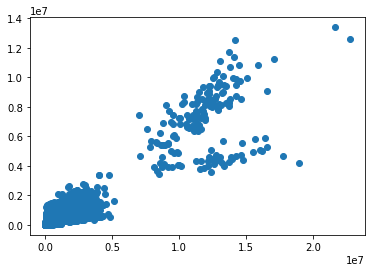

In [20]:
plt.scatter(data["code1"],data["Small Bags"])

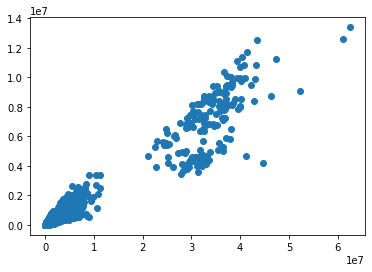

In [21]:
plt.scatter(data["Total Volume"],data["Small Bags"])

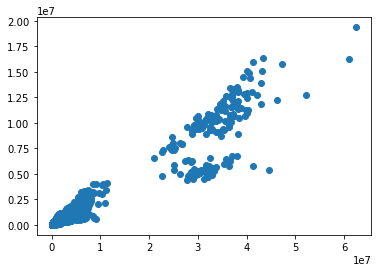

In [22]:
plt.scatter(data["Total Volume"],data["Total Bags"])

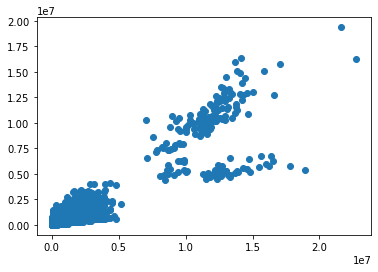

In [23]:
plt.scatter(data["code1"],data["Total Bags"])

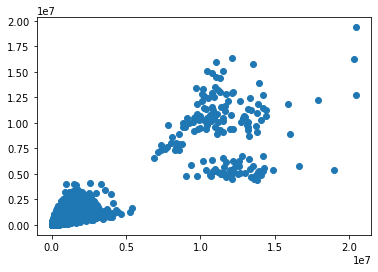

In [24]:
plt.scatter(data["code2"],data["Total Bags"])

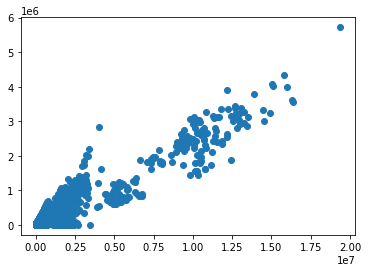

In [25]:
plt.scatter(data["Total Bags"],data["Large Bags"])

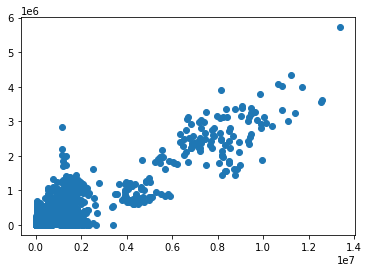

In [26]:
plt.scatter(data["Small Bags"],data["Large Bags"])

In [27]:
data.drop(columns=["Total Volume","Total Bags","Small Bags"],inplace=True)
x=data.drop("region",axis=1)
y=data.region


In [28]:
data.head()

,AveragePrice,code1,code2,code3,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,93.25,0.0,0,2015,0
1,1.35,674.28,44638.81,58.33,97.49,0.0,0,2015,0
2,0.93,794.70,109149.67,130.50,103.14,0.0,0,2015,0
3,1.08,1132.00,71976.41,72.58,133.76,0.0,0,2015,0
4,1.28,941.48,43838.39,75.78,197.69,0.0,0,2015,0


In [29]:
from sklearn.feature_selection import SelectKBest,f_classif

best_features=SelectKBest(score_func=f_classif,k=7)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(7,"Scores_obtained"))

   Column_names  Scores_obtained
2         code2       308.834412
1         code1       295.483768
4    Large Bags       254.735012
3         code3       208.050643
5   XLarge Bags       123.297554
0  AveragePrice        69.383811
6          type         0.000496


In [30]:
x=data.drop(columns=["type","year","region"],axis=1)
y=data["region"]

In [31]:
scaler=StandardScaler()
df1=scaler.fit_transform(x)


In [32]:
df1

array([[-0.18868864, -0.23081597, -0.1999022 , -0.21209136, -0.22235202,
        -0.17557961],
       [-0.13901962, -0.23110251, -0.20805446, -0.21199672, -0.22233464,
        -0.17557961],
       [-1.18206895, -0.23100731, -0.1544779 , -0.21132513, -0.22231148,
        -0.17557961],
       ...,
       [ 1.15237477, -0.2306933 , -0.24309014, -0.20576554, -0.22256082,
        -0.17557961],
       [ 1.30138182, -0.2304279 , -0.24265143, -0.20577419, -0.2225293 ,
        -0.17557961],
       [ 0.53151208, -0.22934712, -0.24317042, -0.21045012, -0.22262764,
        -0.17557961]])

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df1,y,test_size=0.25,random_state=21)


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from time import time 
knn=KNeighborsClassifier()
start=time()
knn.fit(x_train,y_train)
print("Training Time :",time()-start)

Training Time : 0.2997777462005615


In [36]:
start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Testing Time: 1.2006573677062988


In [37]:
cfm=confusion_matrix(y_test,y_pred)
cfm


array([[40,  1,  0, ...,  0,  0,  0],
       [ 0, 38,  0, ...,  0,  0,  1],
       [ 0,  2, 36, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 88,  0,  0],
       [ 1,  0,  0, ...,  0, 59,  0],
       [ 1, 12,  2, ...,  0,  0, 33]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.28      0.50      0.36        80
           1       0.23      0.48      0.31        79
           2       0.39      0.43      0.41        83
           3       0.38      0.47      0.42       104
           4       0.25      0.42      0.31        74
           5       0.24      0.23      0.23        99
           6       0.69      0.75      0.72        88
           7       0.40      0.47      0.43        87
           8       0.68      0.78      0.72        86
           9       0.37      0.45      0.41       100
          10       0.23      0.36      0.28        74
          11       0.43      0.51      0.47        83
          12       0.61      0.60      0.60        95
          13       0.42      0.36      0.39        95
          14       0.36      0.43      0.39        77
          15       0.53      0.66      0.59        73
          16       0.34      0.30      0.32       100
          17       0.40    

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x,y,cv=10).mean()

0.4646774212929583

In [40]:
# It clearly indicates that the model is not overfitting, lets do Hyperparameter Tuning to increase the accuracy 

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
param_grid={"algorithm" : ["kd_tree","brute"],
           "leaf_size" : [8,10,12,14,16],
           "n_neighbors" : [2,4,6,8,12]}


In [43]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)


In [44]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [8, 10, 12, 14, 16],
                         'n_neighbors': [2, 4, 6, 8, 12]})

In [45]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 8, 'n_neighbors': 2}

In [46]:
knn=KNeighborsClassifier(algorithm= 'kd_tree', leaf_size= 8, n_neighbors= 2)
start=time()
knn.fit(x_train,y_train)
print("Training Time :",time()-start)
start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 0.1516115665435791
Testing Time: 0.7515392303466797


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.53      0.37        80
           1       0.29      0.51      0.37        79
           2       0.45      0.55      0.50        83
           3       0.44      0.55      0.49       104
           4       0.27      0.43      0.34        74
           5       0.26      0.32      0.29        99
           6       0.68      0.82      0.74        88
           7       0.43      0.61      0.50        87
           8       0.67      0.79      0.72        86
           9       0.37      0.47      0.42       100
          10       0.22      0.42      0.28        74
          11       0.48      0.71      0.58        83
          12       0.57      0.64      0.60        95
          13       0.40      0.41      0.40        95
          14       0.38      0.51      0.43        77
          15       0.56      0.73      0.63        73
          16       0.39      0.34      0.36       100
          17       0.40    

In [48]:
# Hence an accuracy of 47% has been acheved .

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)



DecisionTreeClassifier()

In [51]:
new_ypred=dt.predict(x_test)

In [52]:
print(classification_report(y_test,new_ypred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62        80
           1       0.56      0.56      0.56        79
           2       0.86      0.82      0.84        83
           3       0.83      0.74      0.78       104
           4       0.57      0.61      0.59        74
           5       0.65      0.57      0.61        99
           6       0.88      0.93      0.91        88
           7       0.71      0.72      0.72        87
           8       0.85      0.86      0.86        86
           9       0.76      0.74      0.75       100
          10       0.56      0.47      0.51        74
          11       0.79      0.83      0.81        83
          12       0.79      0.81      0.80        95
          13       0.68      0.64      0.66        95
          14       0.77      0.70      0.73        77
          15       0.88      0.89      0.88        73
          16       0.91      0.83      0.87       100
          17       0.74    

In [53]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,new_ypred)

0.7223317992548762

In [54]:
param_grid={"criterion": ["gini","entropy"],
           "max_depth": range(10,15),
           "min_samples_leaf": range(2,8),
           "min_samples_split": range(3,8)}

In [55]:
gridsearch=GridSearchCV(estimator=dt,param_grid=param_grid,cv=4,n_jobs=-1)

In [56]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(3, 8)})

In [57]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [59]:
dt=DecisionTreeClassifier(criterion='entropy',
 max_depth= 14,
 min_samples_leaf= 2,
 min_samples_split= 4)

dt.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=2,
                       min_samples_split=4)

In [60]:
new_ypred=dt.predict(x_test)

In [61]:
accuracy_score(y_test,new_ypred)

0.7214551829936445

In [62]:
# Attaining a max accuracy of 72% after the hyperparameter tuning .


In [63]:
from sklearn.ensemble import BaggingClassifier

In [64]:
bag_cls=BaggingClassifier(dt,n_estimators=6,max_samples=0.6,bootstrap=True,random_state=4,oob_score=True)

In [65]:
bag_cls.fit(x_train,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=14,
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  max_samples=0.6, n_estimators=6, oob_score=True,
                  random_state=4)

In [66]:
bag_cls.score(x_test,y_test)

0.7604646066184527

In [67]:
# The best accuracy achieved is 76%

In [68]:
from sklearn.ensemble import AdaBoostClassifier

In [69]:
ada=AdaBoostClassifier()

In [70]:
start=time()
ada.fit(x_train,y_train)
print("Training time :",time()-start)


Training time : 6.747064828872681


In [71]:
start=time()
y_preds=ada.predict(x_test)
print("Testing time :",time()-start)

Testing time : 1.4551076889038086


In [74]:
from sklearn import metrics 


In [75]:
cross_val_score(ada,x,y,cv=10).mean()

0.05715290795481855

In [76]:
# It shows very poor result , moving towards next algorithm 

In [77]:
from sklearn.ensemble import GradientBoostingClassifier


In [78]:
gbdt_cl=GradientBoostingClassifier()
gbdt_cl.fit(x_train,y_train)

GradientBoostingClassifier()

In [79]:
ypred_=gbdt_cl.predict(x_test)

In [80]:
metrics.r2_score(y_test,ypred_)

0.5365357122272338

In [81]:
print(classification_report(y_test,ypred_))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64        80
           1       0.59      0.59      0.59        79
           2       0.93      0.82      0.87        83
           3       0.83      0.75      0.79       104
           4       0.74      0.62      0.68        74
           5       0.74      0.56      0.64        99
           6       0.95      0.93      0.94        88
           7       0.78      0.84      0.81        87
           8       0.95      0.95      0.95        86
           9       0.84      0.81      0.82       100
          10       0.51      0.65      0.57        74
          11       0.78      0.88      0.82        83
          12       0.86      0.83      0.84        95
          13       0.72      0.64      0.68        95
          14       0.71      0.78      0.75        77
          15       0.97      0.85      0.91        73
          16       0.93      0.80      0.86       100
          17       0.79    

In [82]:
# Hence 75% accuracy has been achieved 

In [83]:
import pickle
final_model="region.pickle"
pickle.dump(gbdt_cl,open(final_model,'wb'))

# lets check for regression now 

In [88]:
data.head()

,AveragePrice,code1,code2,code3,Large Bags,XLarge Bags,type,year,region
0,1.33,1036.74,54454.85,48.16,93.25,0.0,0,2015,0
1,1.35,674.28,44638.81,58.33,97.49,0.0,0,2015,0
2,0.93,794.70,109149.67,130.50,103.14,0.0,0,2015,0
3,1.08,1132.00,71976.41,72.58,133.76,0.0,0,2015,0
4,1.28,941.48,43838.39,75.78,197.69,0.0,0,2015,0


In [85]:
x=data.drop("AveragePrice",axis=1)
y=data["AveragePrice"]

In [86]:
best_features=SelectKBest(score_func=f_classif,k=7)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(7,"Scores_obtained"))

  Column_names  Scores_obtained
5         type        53.269112
0        code1         5.015080
2        code3         4.078789
1        code2         3.508901
3   Large Bags         3.269397
6         year         3.056698
4  XLarge Bags         1.746996


In [102]:
x=data[["type","code1","code3","code2","Large Bags","year","XLarge Bags"]]
y=data["AveragePrice"]


In [103]:
x.shape

(18249, 7)

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=51)

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [107]:
y_predict=lm.predict(x_test)

In [108]:
lm.score(x_train,y_train)

0.4071813822097402

In [109]:
lm.score(x_test,y_test)

0.40407217742834634

In [110]:
import statsmodels.formula.api as smf
data.rename(columns=({"Large Bags":"Large_bags","XLarge Bags":"XLarge_bags"}),inplace=True)

In [111]:
lm1=smf.ols(formula='AveragePrice ~ type+code1+code3+code2+Large_bags+year+XLarge_bags',data=data).fit()
print(lm1.pvalues)

Intercept      4.089173e-57
type[T.1]      0.000000e+00
code1          6.963930e-60
code3          9.025592e-20
code2          2.604431e-74
Large_bags     1.975638e-13
year           1.010994e-58
XLarge_bags    2.435881e-18
dtype: float64


In [112]:
#since all the pvalues are less than 0.05 , Hence we cannot drop any of th efeatures .
#Maximum accuracy achieved is 40% .

In [113]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [114]:
mean_squared_error(y_test,y_predict)

0.09589726234103971

In [115]:
mean_absolute_error(y_test,y_predict)

0.2379762330134913

In [116]:
# lets check on other algorithms 

In [117]:
from sklearn.neighbors import KNeighborsRegressor

In [118]:
knr=KNeighborsRegressor()

In [119]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [120]:
y_pred=knr.predict(x_test)

In [121]:
knr.score(x_train,y_train)

0.7299451507653664

In [122]:
knr.score(x_test,y_test)

0.5868518598439434

In [123]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[7,8,10,12,13],
           "n_neighbors":[5,7,9,11,14]}


In [124]:
gridsearch=GridSearchCV(estimator=knr,param_grid=param_grid)

In [125]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [7, 8, 10, 12, 13],
                         'n_neighbors': [5, 7, 9, 11, 14]})

In [126]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 7, 'n_neighbors': 11}

In [127]:
knr=KNeighborsRegressor(algorithm= 'kd_tree', leaf_size= 7, n_neighbors= 11)
start=time()
knr.fit(x_train,y_train)
print("Training Time :",time()-start)
start=time()
y_pred=knr.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 0.2560276985168457
Testing Time: 0.31711506843566895


In [128]:
y_preds=knr.predict(x_test) 

In [129]:
knr.score(x_train,y_train)

0.6710813179056073

In [130]:
knr.score(x_test,y_test)

0.601087903761574

In [131]:
#The accuracy increased by 3% .
#Lets check other algorithms as well

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [134]:
y_pred=dtr.predict(x_test)


In [135]:
dtr.score(x_train,y_train)

1.0

In [136]:
dtr.score(x_test,y_test)

0.5129017326569385

In [137]:
from sklearn.linear_model import LassoCV

In [149]:
lassCV=LassoCV(alphas=None,max_iter=100,normalize=True)
lassCV.fit(x_train,y_train)
alpha=lassCV.alpha_
alpha

2.1186156524562267e-06

In [152]:
# lets do hyperparameter tuning

In [153]:
# the grid parameters are given

In [154]:
param_grid={
           "max_depth":range(10,18),
           "min_samples_leaf":range(2,7),
           "min_samples_split":range(3,10)}

In [155]:
grid_search=GridSearchCV(estimator=dtr,param_grid=param_grid,cv=5,n_jobs=-1)


In [156]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 18),
                         'min_samples_leaf': range(2, 7),
                         'min_samples_split': range(3, 10)})

In [157]:
grid_search.best_params_

{'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 3}

In [158]:
dtr=DecisionTreeRegressor(max_depth= 11, min_samples_leaf= 6, min_samples_split=3)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=3)

In [159]:
y_predicts=dtr.predict(x_test)

In [160]:
dtr.score(x_test,y_test)

0.6458285223608279

In [161]:
# Hence accuracy achieved is 64%

In [162]:
from sklearn.ensemble import RandomForestRegressor 

In [163]:
rfr= RandomForestRegressor()

In [164]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [165]:
yy_pred=rfr.predict(x_test)

In [166]:
rfr.score(x_test,y_test)

0.7538461916238198

In [167]:
clf=RandomForestRegressor()

In [168]:
param_grid={"max_depth":range(2,4),
           "min_samples_leaf":range(2,4),
           "min_samples_split":range(4,6)
           }

In [169]:
grid_search=GridSearchCV(clf,param_grid=param_grid)


In [170]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 4),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(4, 6)})

In [171]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}

In [172]:
rfr= RandomForestRegressor(max_depth= 3, min_samples_leaf= 3, min_samples_split= 5)

In [173]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=3, min_samples_split=5)

In [174]:
y_pred=rfr.predict(x_test)

In [175]:
rfr.score(x_train,y_train)

0.49831997291619445

In [176]:
# Parameters has to be choosed very carefully ,because RandomForest can easily overfit the data
#lets drop this algorithm and move towards next algorithm.

In [177]:
from sklearn.ensemble import AdaBoostRegressor 

In [178]:
ada=AdaBoostRegressor()

In [179]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [180]:
y__preds=ada.predict(x_test)

In [181]:
ada.score(x_train,y_train)

0.48124925876974534

In [182]:
ada.score(x_test,y_test)

0.48030769171616994

In [183]:
from sklearn.model_selection import RandomizedSearchCV

In [184]:
dt=DecisionTreeRegressor()

In [185]:
params={'n_estimators':[40,45,50,55],
       'learning_rate':[0.25,0.30,0.35,0.40]}

In [186]:
rnd=RandomizedSearchCV(ada,cv=5,param_distributions=params)

In [187]:
rnd.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.35, 0.4],
                                        'n_estimators': [40, 45, 50, 55]})

In [188]:
rnd.best_params_

{'n_estimators': 40, 'learning_rate': 0.3}

In [189]:
ada=AdaBoostRegressor(n_estimators= 40, learning_rate= 0.3)

In [190]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.3, n_estimators=40)

In [191]:
y_pred=ada.predict(x_test)

In [192]:
ada.score(x_test,y_test)

0.4959134409564495

In [193]:
# we are able to increase the efficiency of results by 4%

In [194]:
from sklearn.ensemble import GradientBoostingRegressor 

In [195]:
xbdt=GradientBoostingRegressor()

In [196]:
xbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [197]:
y_preed=xbdt.predict(x_test)

In [198]:
xbdt.score(x_train,y_train)

0.6444970159787993

In [199]:
xbdt.score(x_test,y_test)

0.6350039435885826

In [200]:
params={'n_estimators':[45,50,55,60],
       'learning_rate':[0.25,0.30,0.35,0.40,0.45]}



In [201]:
rnd=RandomizedSearchCV(xbdt,cv=5,param_distributions=params)

In [202]:
rnd.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.35, 0.4,
                                                          0.45],
                                        'n_estimators': [45, 50, 55, 60]})

In [203]:
rnd.best_params_

{'n_estimators': 60, 'learning_rate': 0.4}

In [204]:
xbdt=GradientBoostingRegressor(n_estimators=60, learning_rate= 0.4)

In [205]:
xbdt.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.4, n_estimators=60)

In [206]:
y_pred=xbdt.predict(x_test)

In [207]:
xbdt.score(x_train,y_train)

0.6863566881253029

In [208]:
xbdt.score(x_test,y_test)

0.6621371337140824

In [209]:
# Hence the accuracy enhanced by 2%.

In [210]:
##Having checked a number of algorithms , the best fitted result for classification  is 76% , and for regression is 66 % .


In [211]:
import pickle
final_model="price.pickle"
pickle.dump(xbdt,open(final_model,'wb'))